<a href="https://www.kaggle.com/code/vsddarna/bharatintern2024-ds-1?scriptVersionId=167313086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


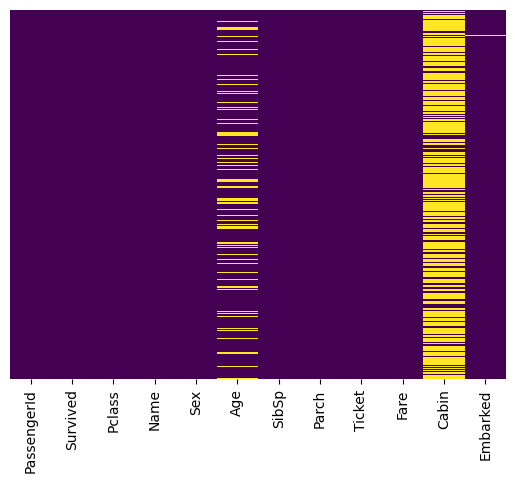

In [5]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

# Analysing Data

<Axes: xlabel='Survived', ylabel='count'>

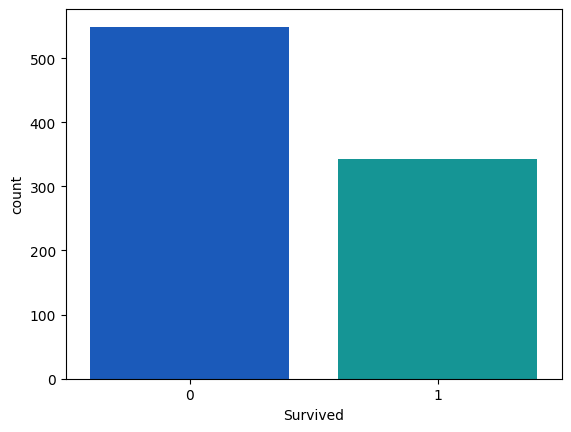

In [6]:
sns.countplot(x = "Survived", data = titanic, palette = "winter")

In [7]:
#Finding out that the number who survived(nearly 300) are lesser than the number who didn't(more than 500)

<Axes: xlabel='Survived', ylabel='count'>

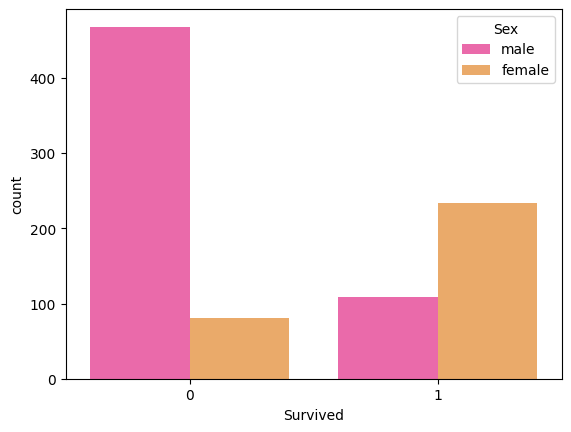

In [8]:
sns.countplot(x= "Survived", hue = "Sex", data = titanic, palette = "spring")

In [9]:
##Analysis: 0 represents not survived and 1 is for survives
# women are thrice more likely to survive than males

<Axes: xlabel='Survived', ylabel='count'>

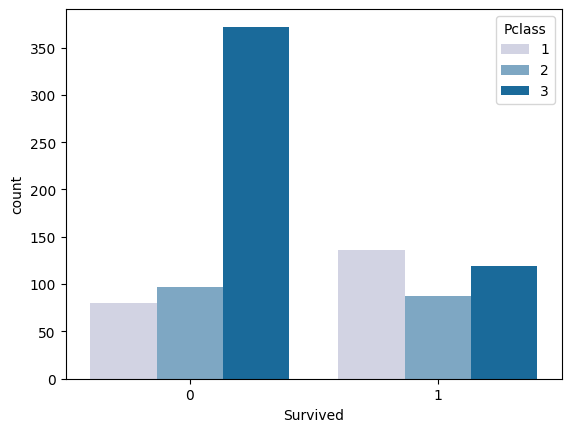

In [10]:
sns.countplot(x = "Survived", hue= "Pclass", data = titanic, palette = 'PuBu')

In [11]:
## analysis: the passengers who did not survive belong to the third class.
# First class passengers are more likely to survive

<Axes: ylabel='Frequency'>

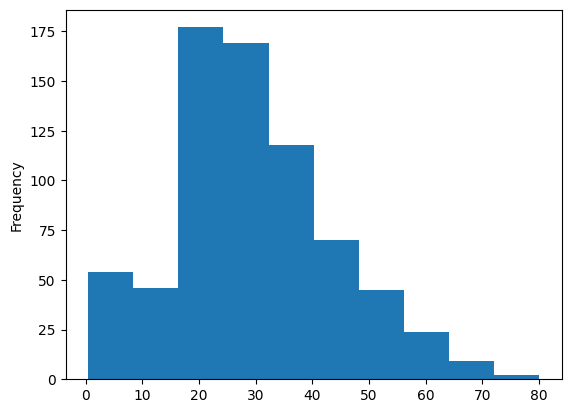

In [12]:
titanic['Age'].plot.hist()

In [13]:
#We notice that highest age group travelling are among age between 20-40
#very few passengers in group 70-80

<Axes: ylabel='Frequency'>

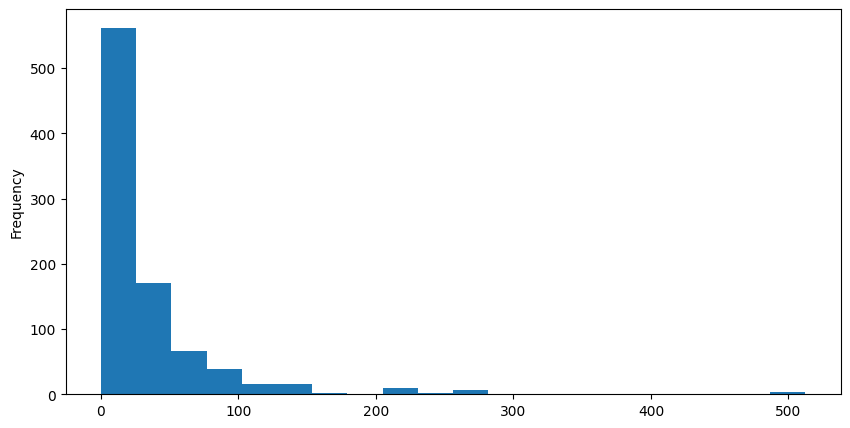

In [14]:
titanic['Fare'].plot.hist(bins = 20, figsize=(10,5))

In [15]:
#we observe that most of the tickets bought are under the fare 100
# and very few are on the higher side of fare i.e. 220 to 500 range

<Axes: xlabel='SibSp', ylabel='count'>

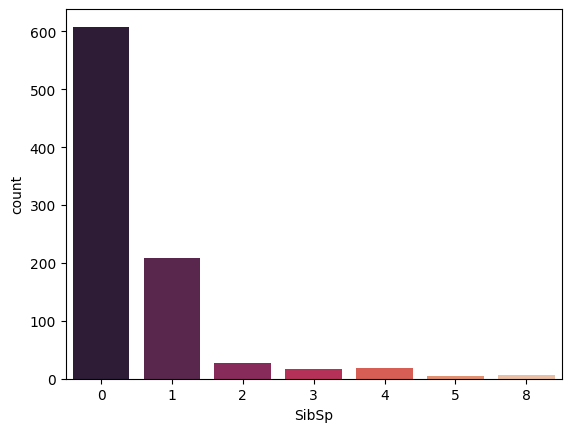

In [16]:
sns.countplot(x = 'SibSp', data = titanic, palette = 'rocket')

In [17]:
# We notice that most of the passengers do not have their siblings aboard

<Axes: xlabel='Parch', ylabel='count'>

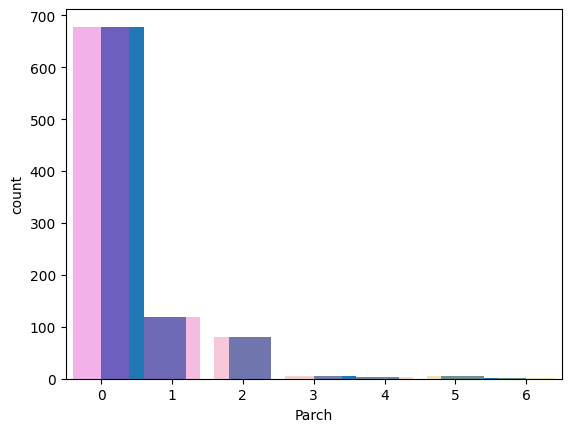

In [18]:
titanic['Parch'].plot.hist()
sns.countplot(x ='Parch', data = titanic, palette = 'spring', alpha = 0.4)

# DATA WRANGLING

In [19]:
## Data wrangling means cleaning the data, removing the null values,
#dropping unwanted columns, adding new ones if needed.

In [20]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
#Age and cabin has almost null values, and embarked too has null values
#We can plot it on heatmap

<Axes: >

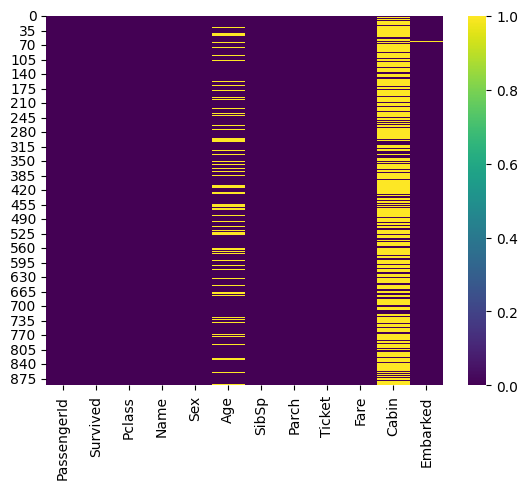

In [22]:
sns.heatmap(titanic.isnull(), cmap = 'viridis')

In [23]:
#Here yellow is used to show the null values, highest in cabin followed by age

<Axes: xlabel='Pclass', ylabel='Age'>

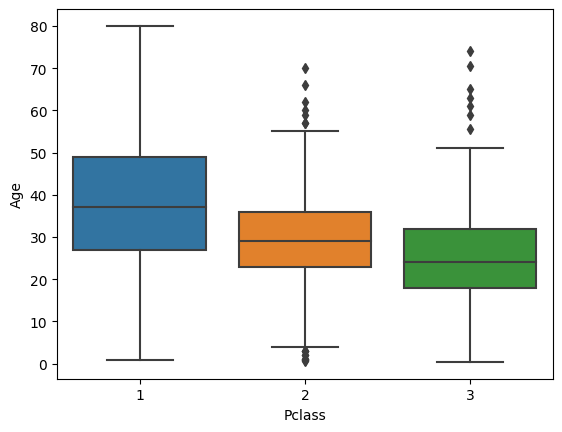

In [24]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [25]:
# This boxplot can be used to figure out the outliers in the dataset
#Using this plot we have found that old people are travelling more in class 1 and 2 compared to class 3

In [26]:
## Now we will drop a few columns

In [27]:
titanic.drop('Cabin', axis = 1, inplace = True)

In [28]:
titanic.dropna(inplace = True)

In [29]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


<Axes: >

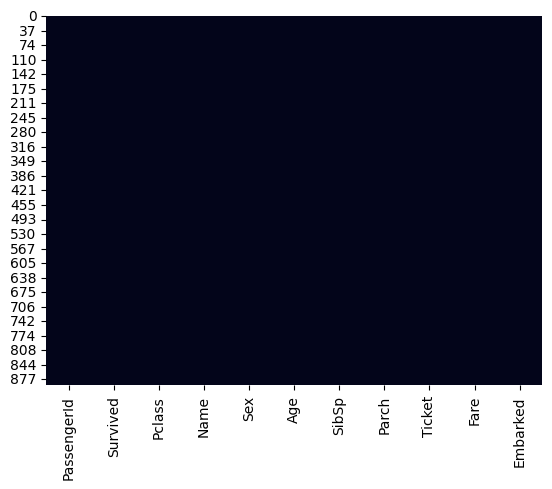

In [30]:
sns.heatmap(titanic.isnull(), cbar = False)

In [31]:
#This shows that we do not have null values

In [32]:
#We can check it using the below column

In [33]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [35]:
#sns.heatmap(titanic, cmap = 'winter')

In [36]:
#Now we need to convert the categorical values to numerical for the model "LOGISTIC REGRESSION" to work properly

In [37]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [38]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [39]:
#sex = pd.get_dummies(titanic['Sex'], drop_first = True)
#sex = sex.astype(int)
#sex.head()

In [40]:
# We have dropped the first column because only one column is enough to determine the gender
#if it is 1 then the passenger is a male else a female

In [41]:
#embark = pd.get_dummies(titanic['Embarked'])

In [42]:
#embark = embark.astype(int)
#embark.head(3)

In [43]:
#Here c stands for Cherbourg, S stands for Southharpton, Q stands for Queenstown,
#we can drop any one of the column as we can infer from the two columns itself

In [44]:
#embark = pd.get_dummies(titanic['Embarked'], drop_first = True)
#embark = embark.astype(int)
#embark.head(3)

In [45]:
#embark

In [46]:
#Pcl = pd.get_dummies(titanic['Pclass'], drop_first = True)
#Pcl = Pcl.astype(int)
#Pcl.head(3)

In [47]:
#Our data is now converted into categorical data

In [48]:
#titanic = pd.concat([titanic,sex, embark, Pcl], axis = 1)
#titanic.head(3)

In [49]:
#Deleting unwanted columns

In [50]:
#titanic.drop(['Name', 'PassengerId','' 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)
#titanic.head(3)

# Train Data

In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
titanic['Sex'] = labelencoder.fit_transform(titanic['Sex'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [52]:
x = titanic[['Pclass', 'Sex']]
y = titanic['Survived']

In [53]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)


In [54]:
titanic['Sex'], titanic['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 885    0
 886    1
 887    0
 889    1
 890    1
 Name: Sex, Length: 712, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 885    0
 886    0
 887    1
 889    1
 890    0
 Name: Survived, Length: 712, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

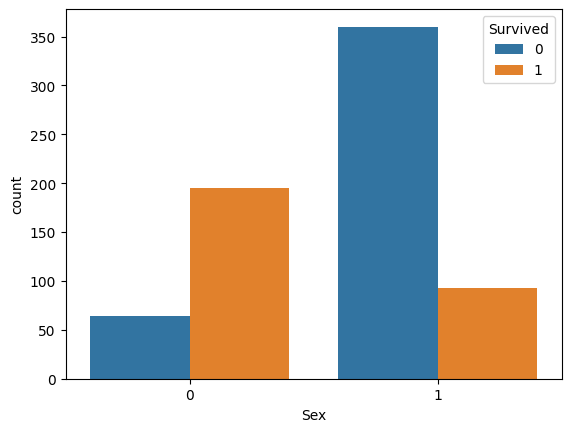

In [55]:
sns.countplot(x = titanic['Sex'], hue = titanic['Survived'])

In [56]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [58]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [59]:
prediction = model.predict(x_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
prediction

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test, prediction)

array([[113,  19],
       [ 30,  52]])

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test, prediction)

0.7710280373831776

In [66]:
import warnings
warnings.filterwarnings('ignore')
res= model.predict([[2,1]])
if res == 0:
    print("The passenger died.")
else:
    print("The passenger survived.")

The passenger died.
